# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [3]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [4]:
df = pd.read_csv('Dataset_clustering.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [6]:
# Mengecek jumlah missing values di setiap kolom
missing_values = df.isnull().sum()
missing_values

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

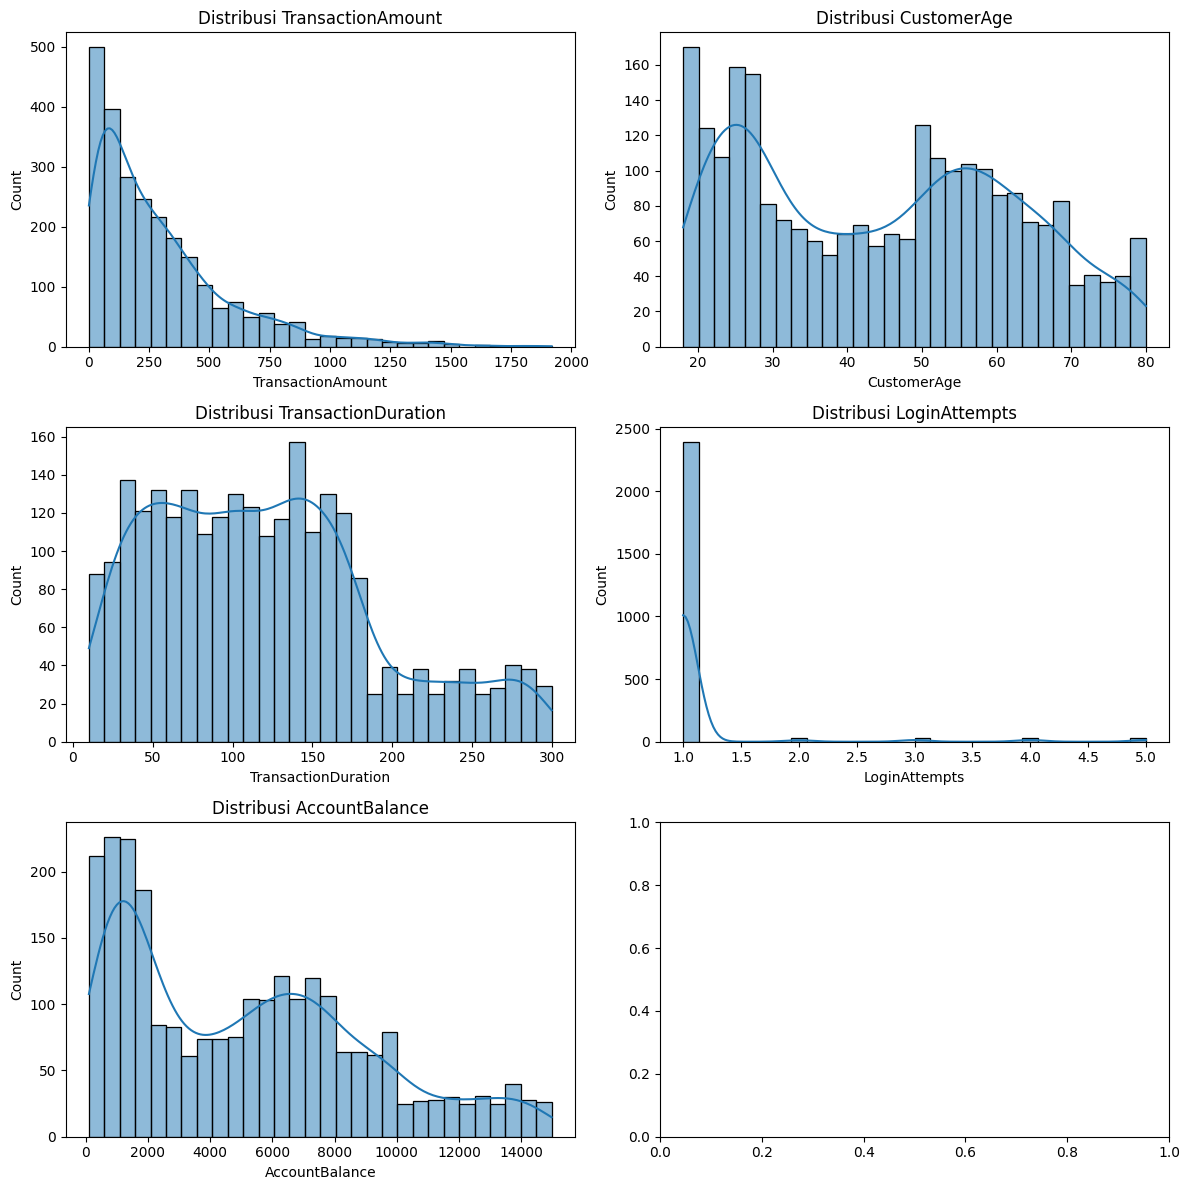

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Statistik deskriptif untuk variabel numerik
desc_stats = df.describe()

# Visualisasi distribusi variabel numerik
numerical_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')

plt.tight_layout()
plt.show()

desc_stats


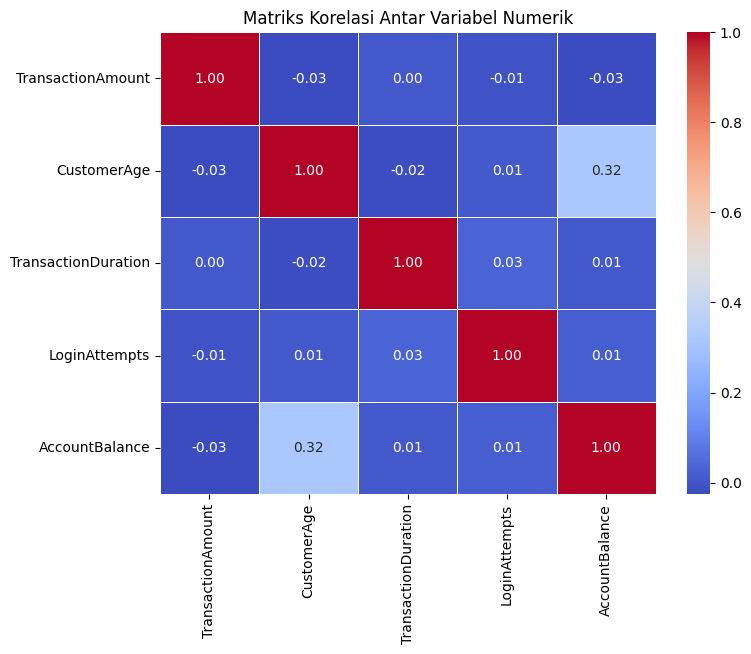

In [8]:
# Matriks korelasi
corr_matrix = df[numerical_cols].corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Antar Variabel Numerik")
plt.show()


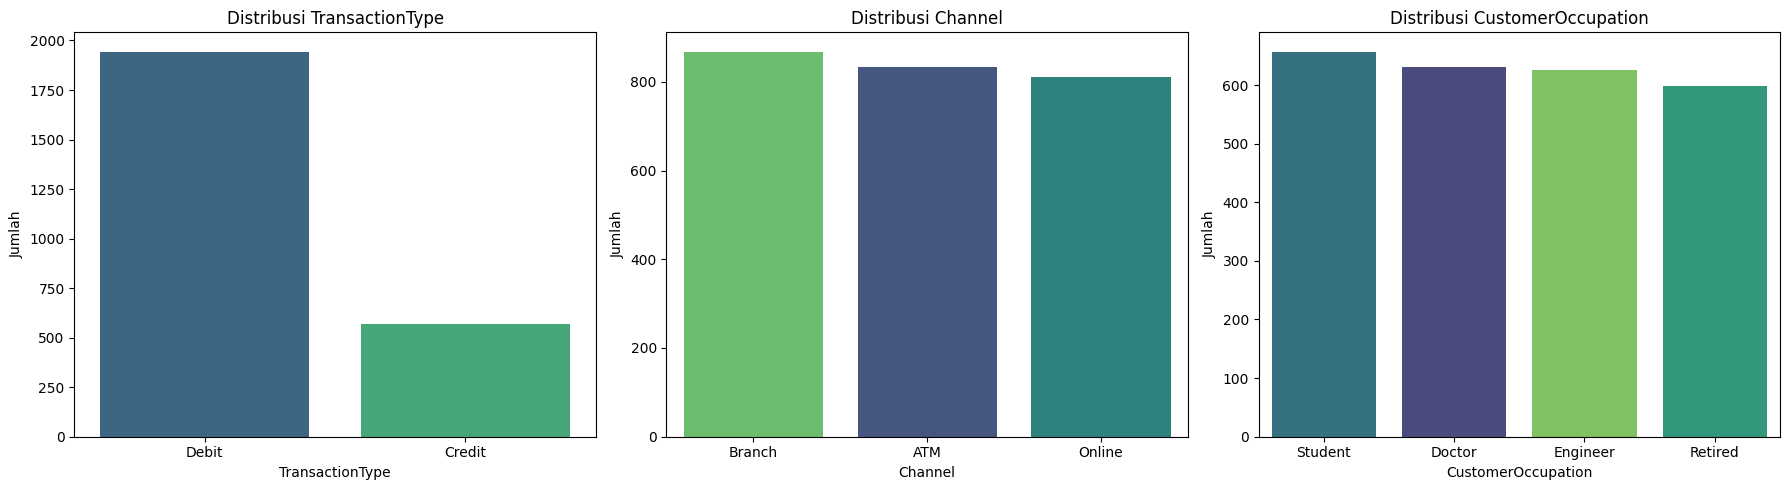

In [9]:
# Visualisasi distribusi variabel kategorikal
categorical_cols = ['TransactionType', 'Channel', 'CustomerOccupation']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col], order=df[col].value_counts().index,hue=df[col], palette="viridis", ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Jumlah")

plt.tight_layout()
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [10]:
df.info(),df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

(None,
   TransactionID AccountID  TransactionAmount      TransactionDate  \
 0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
 1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
 2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
 3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
 4      TX000005   AC00411              13.45  2023-10-16 17:51:24   
 
   TransactionType   Location DeviceID      IP Address MerchantID Channel  \
 0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
 1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
 2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
 3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
 4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   
 
    CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
 0           70             Docto

In [11]:
# Cek missing values
missing_values = df.isnull().sum()
missing_values

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [12]:
# Cek duplikasi
duplicate_rows = df.duplicated().sum()
duplicate_rows

np.int64(0)

In [29]:
# Menghapus kolom yang tidak relevan
df_clean = df.drop(columns=["TransactionID", "AccountID", "DeviceID", "IP Address", "MerchantID"])

# Mengubah tanggal menjadi format datetime
df_clean["TransactionDate"] = pd.to_datetime(df_clean["TransactionDate"])
df_clean["PreviousTransactionDate"] = pd.to_datetime(df_clean["PreviousTransactionDate"])

# Menghitung selisih waktu dalam hari
df_clean["DaysSinceLastTransaction"] = (df_clean["TransactionDate"] - df_clean["PreviousTransactionDate"]).dt.days

# Menghapus kolom tanggal asli
df_clean = df_clean.drop(columns=["TransactionDate", "PreviousTransactionDate"])

In [ ]:
# Encoding Data Kategorikal
categorical_cols = ["TransactionType", "Location", "Channel", "CustomerOccupation"]
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

In [ ]:
# Normalisasi
numerical_cols = ["TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance", "DaysSinceLastTransaction"]
scaler = StandardScaler()
df_clean[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])


df_clean.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysSinceLastTransaction
0,-0.971275,1,36,0,1.423718,0,-0.552443,-0.206794,-0.000537,-0.800526
1,0.269440,1,15,0,1.311287,0,0.305314,-0.206794,2.216472,-0.076554
2,-0.586882,1,23,2,-1.443277,3,-0.909842,-0.206794,-1.023534,0.045675
3,-0.387456,1,33,2,-1.049768,3,-1.353017,-0.206794,0.885797,-0.574872
4,-0.973468,0,1,2,-1.049768,3,1.120184,-0.206794,0.593589,0.967094


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [16]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Menentukan jumlah cluster optimal menggunakan Elbow Method
inertia = []
K_range = range(2, 11)  # Mencoba jumlah cluster dari 2 hingga 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_clean)
    inertia.append(kmeans.inertia_)


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

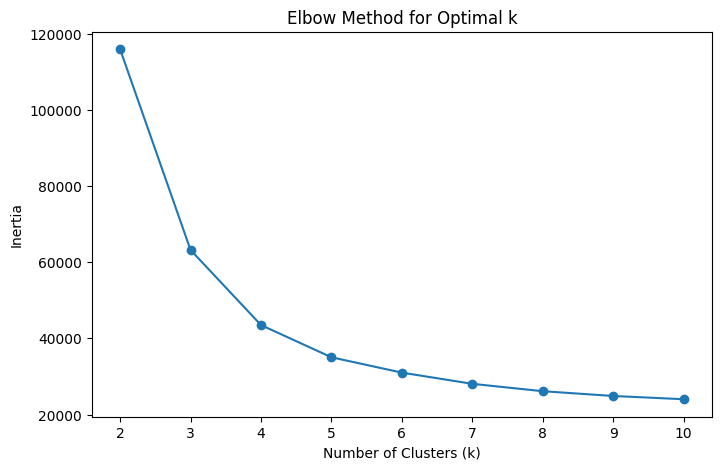

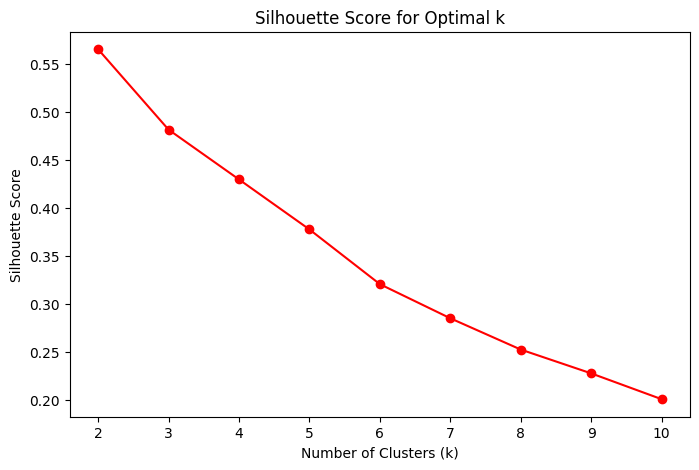

2

In [17]:
# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

from sklearn.metrics import silhouette_score

# Menentukan jumlah cluster optimal menggunakan Silhouette Score
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_clean)
    score = silhouette_score(df_clean, cluster_labels)
    silhouette_scores.append(score)

# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker="o", linestyle="-", color="r")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal k")
plt.show()

# Menampilkan jumlah cluster dengan skor tertinggi
optimal_k = K_range[np.argmax(silhouette_scores)]
optimal_k

In [18]:
# Melatih model K-Means dengan k=2
kmeans_final = KMeans(n_clusters=2, random_state=42, n_init=10)
df_clean["Cluster"] = kmeans_final.fit_predict(df_clean)

# Menampilkan distribusi cluster
df_clean["Cluster"].value_counts()


Cluster
0    1282
1    1230
Name: count, dtype: int64

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TransactionAmount         2512 non-null   float64
 1   TransactionType           2512 non-null   int64  
 2   Location                  2512 non-null   int64  
 3   Channel                   2512 non-null   int64  
 4   CustomerAge               2512 non-null   float64
 5   CustomerOccupation        2512 non-null   int64  
 6   TransactionDuration       2512 non-null   float64
 7   LoginAttempts             2512 non-null   float64
 8   AccountBalance            2512 non-null   float64
 9   DaysSinceLastTransaction  2512 non-null   float64
 10  Cluster                   2512 non-null   int32  
dtypes: float64(6), int32(1), int64(4)
memory usage: 206.2 KB


In [20]:
from sklearn.feature_selection import VarianceThreshold

# Menggunakan Variance Threshold untuk mendeteksi fitur dengan variasi rendah
selector = VarianceThreshold(threshold=0.01)
selected_features = selector.fit_transform(df_clean.drop(columns=["Cluster"]))

# Menampilkan fitur yang dipertahankan
selected_feature_names = df_clean.drop(columns=["Cluster"]).columns[selector.get_support()]
selected_feature_names


Index(['TransactionAmount', 'TransactionType', 'Location', 'Channel',
       'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'DaysSinceLastTransaction'],
      dtype='object')

Hasil Variance Threshold menunjukkan bahwa semua fitur tetap dipertahankan karena memiliki variabilitas yang cukup. Tidak ada fitur yang dihapus.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

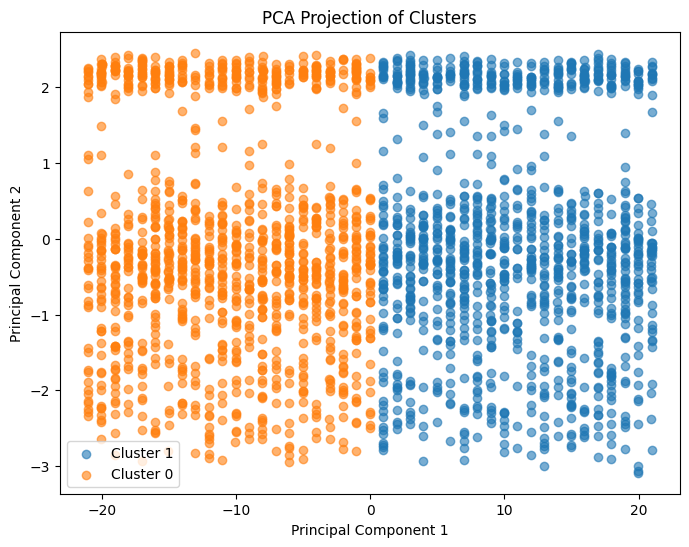

In [21]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Mengurangi dimensi data menjadi 2D menggunakan PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_clean.drop(columns=["Cluster"]))

# Membuat DataFrame hasil PCA
df_pca = pd.DataFrame(df_pca, columns=["PC1", "PC2"])
df_pca["Cluster"] = df_clean["Cluster"]

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
for cluster in df_pca["Cluster"].unique():
    subset = df_pca[df_pca["Cluster"] == cluster]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {cluster}", alpha=0.6)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Clusters")
plt.legend()
plt.show()


In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TransactionAmount         2512 non-null   float64
 1   TransactionType           2512 non-null   int64  
 2   Location                  2512 non-null   int64  
 3   Channel                   2512 non-null   int64  
 4   CustomerAge               2512 non-null   float64
 5   CustomerOccupation        2512 non-null   int64  
 6   TransactionDuration       2512 non-null   float64
 7   LoginAttempts             2512 non-null   float64
 8   AccountBalance            2512 non-null   float64
 9   DaysSinceLastTransaction  2512 non-null   float64
 10  Cluster                   2512 non-null   int32  
dtypes: float64(6), int32(1), int64(4)
memory usage: 206.2 KB


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [23]:
# Inverse transform fitur kategorikal
for col in categorical_cols:
    df_clean[col] = label_encoders[col].inverse_transform(df_clean[col])

# Inverse transform fitur numerik yang telah dinormalisasi
df_original = df.copy()  # Membuat salinan dataset asli untuk ditambahkan hasil inverse
df_original[numerical_cols] = scaler.inverse_transform(df_clean[numerical_cols])

# Menambahkan hasil cluster ke dataset asli
df_original["Cluster"] = df_clean["Cluster"]

# Menampilkan beberapa baris pertama dari dataset asli yang telah diperbarui
df_original.head()


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,DaysSinceLastTransaction,Cluster
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,-573.0,1
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,-496.0,0
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,-483.0,1
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,-549.0,1
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26.0,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,-385.0,0


In [24]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TransactionID             2512 non-null   object 
 1   AccountID                 2512 non-null   object 
 2   TransactionAmount         2512 non-null   float64
 3   TransactionDate           2512 non-null   object 
 4   TransactionType           2512 non-null   object 
 5   Location                  2512 non-null   object 
 6   DeviceID                  2512 non-null   object 
 7   IP Address                2512 non-null   object 
 8   MerchantID                2512 non-null   object 
 9   Channel                   2512 non-null   object 
 10  CustomerAge               2512 non-null   float64
 11  CustomerOccupation        2512 non-null   object 
 12  TransactionDuration       2512 non-null   float64
 13  LoginAttempts             2512 non-null   float64
 14  AccountB

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [25]:
# Melihat statistik deskriptif berdasarkan setiap cluster
cluster_summary = df_original.groupby("Cluster").describe()
cluster_summary


TransactionAmount                                                  \
                    count        mean         std   min      25%      50%   
Cluster                                                                     
0                  1282.0  294.421942  286.248015  0.32  77.1475  214.345   
1                  1230.0  300.899707  297.849981  0.26  85.5050  204.630   

                           CustomerAge             ... AccountBalance  \
              75%      max       count       mean  ...            75%   
Cluster                                            ...                  
0        416.5575  1831.02      1282.0  45.071763  ...      7795.5525   
1        411.3900  1919.11      1230.0  44.259350  ...      7626.0375   

                  DaysSinceLastTransaction                                 \
              max                    count        mean         std    min   
Cluster                                                                     
0        14942.78                   1282.0 -487.510140  106.789148 -672.0   
1        14977.99                   1230.0 -488.220325  105.991853 -672.0   

                                     
           25%    50%    75%    max  
Cluster                              
0       -581.0 -482.5 -392.0 -308.0  
1       -584.0 -489.0 -396.0 -308.0  

[2 rows x 48 columns]

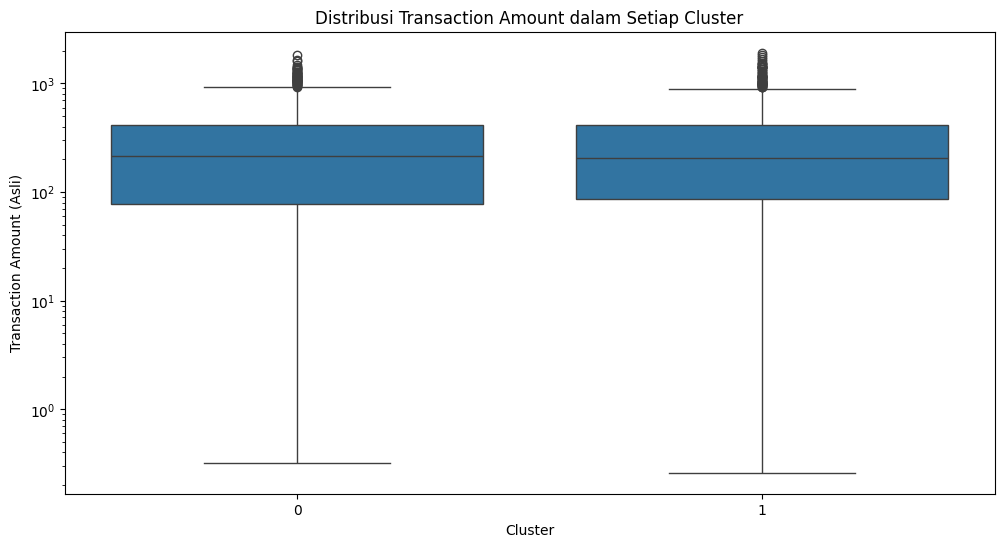

In [26]:
import seaborn as sns

# Membuat figure untuk visualisasi
plt.figure(figsize=(12, 6))

# Distribusi Transaction Amount dalam setiap cluster
sns.boxplot(x="Cluster", y="TransactionAmount", data=df_original)
plt.title("Distribusi Transaction Amount dalam Setiap Cluster")
plt.xlabel("Cluster")
plt.ylabel("Transaction Amount (Asli)")
plt.yscale("log")  # Menggunakan log scale untuk menangani outlier besar
plt.show()


Tulis hasil interpretasinya di sini.
1. Cluster 0:
    Memiliki jumlah transaksi yang bervariasi, dengan nilai median sekitar 100-300.
    Terdapat beberapa transaksi besar (outlier) yang signifikan.
    Usia pelanggan dalam cluster ini memiliki rata-rata 45 tahun, tidak jauh berbeda dengan cluster lain.
    Mayoritas transaksi tampak normal, tetapi ada beberapa transaksi bernilai besar yang bisa dianalisis lebih lanjut untuk potensi fraud.
    
2. Cluster 1:
    Distribusi transaksi mirip dengan Cluster 0, dengan rentang jumlah transaksi yang luas.
    Memiliki outlier dalam transaksi besar, menunjukkan adanya beberapa transaksi bernilai tinggi.
    Usia pelanggan juga berada di kisaran 44-45 tahun, yang tidak berbeda jauh dari cluster lain.
    Diperlukan analisis lebih lanjut untuk memahami apakah cluster ini memiliki karakteristik fraud lebih tinggi dibanding Cluster 0.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Rata-rata Transaction Amount:** 294.42 
- **Rata-rata Customer Age:** 45.07 tahun
- **Distribusi Hari Sejak Transaksi Terakhir** Median sekitar -487 hari
- **Analisis:** Pelanggan dalam cluster ini memiliki jumlah transaksi yang bervariasi, dengan sebagian besar berada di kisaran normal (100-300). Beberapa transaksi bernilai besar muncul sebagai outlier, yang perlu dianalisis lebih lanjut untuk kemungkinan indikasi fraud. Dari segi usia, pelanggan di cluster ini memiliki rentang usia yang cukup lebar tetapi rata-rata berada di sekitar 45 tahun Cluster ini bisa mencerminkan pelanggan reguler dengan pola transaksi normal, tetapi beberapa transaksi besar perlu dievaluasi lebih lanjut.

## Cluster 1:
- **Rata-rata Transaction Amount:** 300.90
- **Rata-rata Customer Age:** 44.26 tahun
- **Distribusi Hari Sejak Transaksi Terakhir** Median sekitar -488 hari
- **Analisis:** Cluster ini memiliki karakteristik yang mirip dengan Cluster 0, dengan distribusi jumlah transaksi yang hampir serupa. Sama seperti Cluster 0, terdapat outlier transaksi besar, yang berpotensi menarik untuk investigasi fraud. Dari segi usia, pelanggan di cluster ini berada pada rentang yang sama, dengan perbedaan yang tidak terlalu signifikan dibanding Cluster 0. Bisa jadi cluster ini menggambarkan pelanggan dengan pola transaksi yang sedikit berbeda dari Cluster 0, tetapi masih dalam kategori normal dengan kemungkinan beberapa transaksi mencurigakan.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [27]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TransactionID             2512 non-null   object 
 1   AccountID                 2512 non-null   object 
 2   TransactionAmount         2512 non-null   float64
 3   TransactionDate           2512 non-null   object 
 4   TransactionType           2512 non-null   object 
 5   Location                  2512 non-null   object 
 6   DeviceID                  2512 non-null   object 
 7   IP Address                2512 non-null   object 
 8   MerchantID                2512 non-null   object 
 9   Channel                   2512 non-null   object 
 10  CustomerAge               2512 non-null   float64
 11  CustomerOccupation        2512 non-null   object 
 12  TransactionDuration       2512 non-null   float64
 13  LoginAttempts             2512 non-null   float64
 14  AccountB

In [ ]:
# Simpan hasil clustering ke dalam CSV untuk digunakan dalam supervised learning
output_file = "Dataset_inisiasi.csv"
df_original.to_csv(output_file, index=False)